### *PhotoDissociation Region Toolbox Notebooks*
-------------------------------------------------------------

# Example 3: Determining Radiation Field and Density

This example shows use the PDRT Toolbox to determine the PDR radiation field $G_0$ and hydrogen nucleus volume density $n$ from your spectral line and far-infrared (FIR) data into the PDR Toolbox.  The case is for single-pixel observations (as in the classic PDRT website).   If you have not gone through the Measurements and ModelSets examples, you should do them first.

[`LineRatioFit`](https://pdrtpy.readthedocs.io/en/latest/pdrtpy.tool.html#lineratiofit) is a tool to fit observations of intensity ratios to a set of PDR models. It takes as input a set of observations with errors represented as [`Measurements`](https://pdrtpy.readthedocs.io/en/latest/pdrtpy.measurement.html) and  [`ModelSet`](https://pdrtpy.readthedocs.io/en/latest/pdrtpy.modelset.html) for the models to which the data will be fitted. The observations should be spectral line or continuum intensities.  They can be spatial maps or single pixel values. They should have the same spatial resolution.  

The models to be fit are stored as intensity ratios.  The input observations will be use to create ratios that correspond to models.  From there a minimization fit is done to determine the density and radiation field that best fit the data.At least 3 observations are needed in order to make at least 2 ratios.  With fewer ratios, no fitting can be done. More ratios generally means better determined density and radiation field, assuming the data are consistent with each other.   

Once the fit is done, [`LineRatioPlot`](https://pdrtpy.readthedocs.io/en/latest/pdrtpy.plot.html#lineratioplot) can be used to view the results.


### Radiation Field and Density from single value Measurements
Following the example on how to use Measurements, create Measurements for your observations.

In [1]:
from pdrtpy.measurement import Measurement
from pdrtpy.modelset import ModelSet
import pdrtpy.pdrutils as utils
from pdrtpy.tool.lineratiofit import LineRatioFit
from pdrtpy.plot.lineratioplot import LineRatioPlot
from astropy.nddata import StdDevUncertainty
import astropy.units as u
import numpy as np

/home/mpound/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1161: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(), op)(other)


In [2]:
# check that your notebooks align with your pdrtpy version
utils.check_nb()

Your PDRT notebooks version matches your pdrtpy version -- hooray!


In [3]:
myunit = "erg s-1 cm-2 sr-1" # my default unit for value and error
m1 = Measurement(data=30.,uncertainty = StdDevUncertainty(5.0),identifier="OI_145",unit=myunit)
m2 = Measurement(data=11.,uncertainty = StdDevUncertainty(2.5),identifier="CI_609",unit=myunit)
m3 = Measurement(data=1.3E9,uncertainty = StdDevUncertainty(2E8),identifier="CO_21",restfreq="230.538 GHz", unit="K km/s")
m4 = Measurement(data=100.,uncertainty = StdDevUncertainty(10.),identifier="CII_158",unit=myunit)
#m5 = Measurement(data=100,uncertainty=StdDevUncertainty(10.),identifier="H200S0",unit=myunit)
#m6 = Measurement(data=210,uncertainty=StdDevUncertainty(20.),identifier="H200S1",unit=myunit)
a = [m1,m2,m3,m4]#,m5,m6]

Now create the fitting tool, feeding it your observations.   It will use the default  Wolfire/Kauffman ModelSet.

In [4]:
p = LineRatioFit(ModelSet("wk2006",z=1),measurements=a)

### Now run it! 
Note the K km s$^{-1}$ get converted on the fly to erg s$^{-1}$ cm$^{-2}$ sr$^{-1}$.  You will get warned that there are no beam parameters in the Measurements.

In [5]:
p.run()

Converting K km/s to erg / (cm2 s sr) using Factor = +1.256E-08 g / (cm K s2)


/home/mpound/src/release_branch/pdrtpy/pdrtpy/tool/lineratiofit.py:343: UserWarning: LineRatioFit: No beam parameters in Measurement headers, assuming they are all equal!
  self._check_compatibility()


### The results are stored in member variables as Measurements.
`pdrutils` has methods to convert between the common radiation field measures. Note: the errors in $n$ and $G_0$ have been set to `NaN` because we don't have a good way to calculate them yet.

In [6]:
print(f"Density = {p.density:3.2e}")
print(f"Radiation Field = {p.radiation_field:3.2e}")
# example conversions
print(f"{utils.toDraine(p.radiation_field):3.2f}")
print(f"{utils.tocgs(p.radiation_field):3.2e}")
print(f"{utils.toMathis(p.radiation_field):3.2e}")

Density = 3.16e+05 +/- nan 1 / cm3
Radiation Field = 5.62e+01 +/- nan Habing
33.08 +/- nan Draine
9.00e-02 +/- nan erg / (cm2 s)
4.97e+01 +/- nan Mathis


## Now on to plotting!
Create a plotter from the tool.  For single pixel measurements, you can plot the observed ratios in (G0,n) space like the classic PDRT.  

In [7]:
plot = LineRatioPlot(p)

In [8]:
# since you only have one pixel, asking to plot density, radiation field, or both just prints
plot.show_both()

(56.23413251903491 +/- nan Habing, 316227.7660168379 +/- nan 1 / cm3)

### LineRatioPlot has many options for how plots are displayed.
You can vary colormap, contours, units, etc.  For an exhaustive list, see the documentation web page or type `help(LineRatioPlot)`.
    

#### Plot your observed ratios with errors on the matching models.  
Here we also show how to change the figure size.

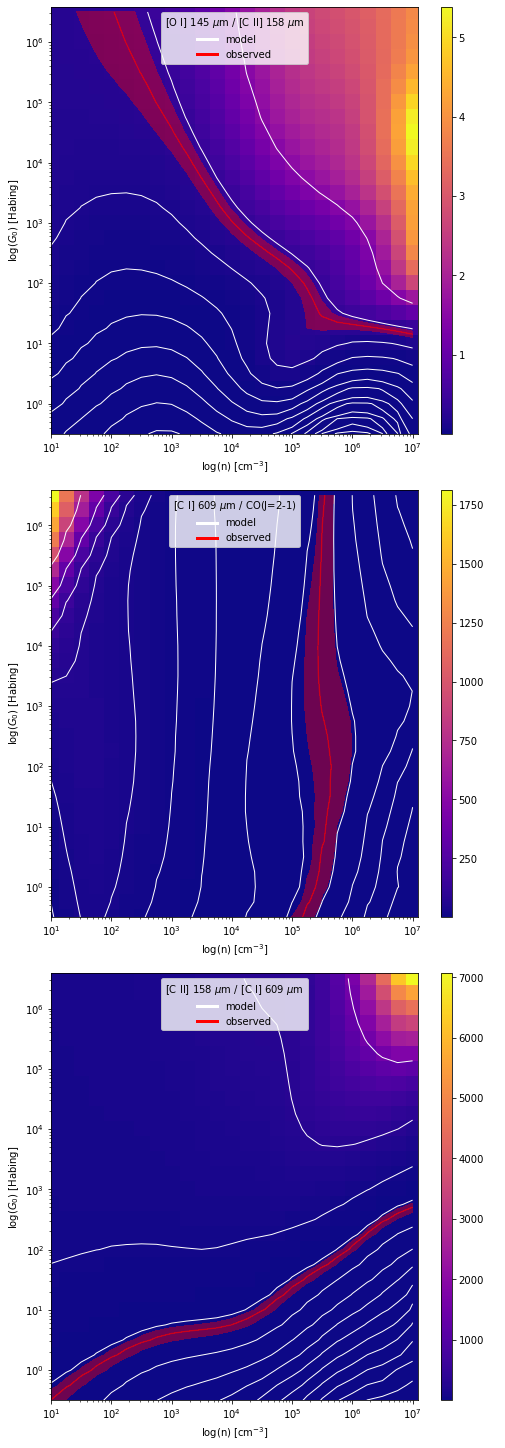

In [9]:
plot.ratios_on_models(yaxis_unit="Habing",image=True,norm='simple',ncols=1,figsize=(10,20), meas_color=['red'])
# Save the figure to a PNG
plot.savefig("modelfits.png")


/home/mpound/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


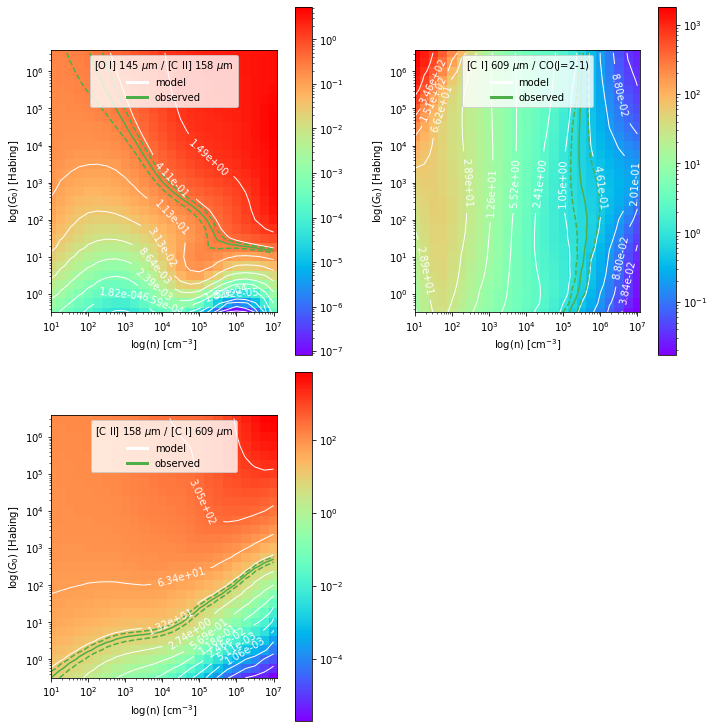

In [10]:
plot.ratios_on_models(norm='log',label=True,cmap='rainbow',shading=0)
# Save as a PNG file
plot.savefig("compare.png")

#### Plot the reduced $\chi^2$ in $(n,G_0)$ space, using an alternative colormap and label the contours

/home/mpound/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


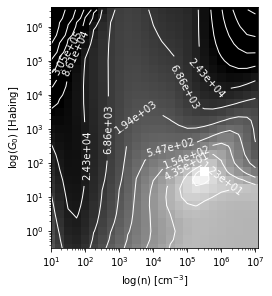

In [11]:
plot.reduced_chisq(cmap='gray_r',norm='log',label=True,colors='white',legend=True,vmax=8E4,figsize=(4,4),yaxis_unit='Habing')
# save as a PNG file
plot.savefig("chisq.png")

#### How about just contours? We need to specify color since default contour color is white.  Also add a legend showing the values at the minimum.

/home/mpound/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


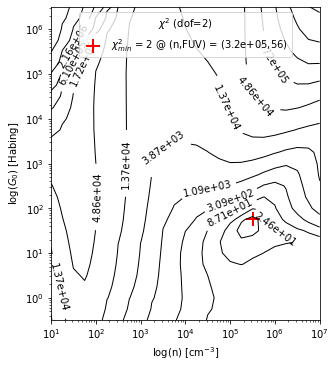

In [12]:
plot.chisq(image=False,cmap='gray_r',norm='log',colors='k',label=True,legend=True,yaxis_unit='Habing')

#### Plot confidence intervals.
The default levels are [50, 68, 80, 95, 99]

/home/mpound/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


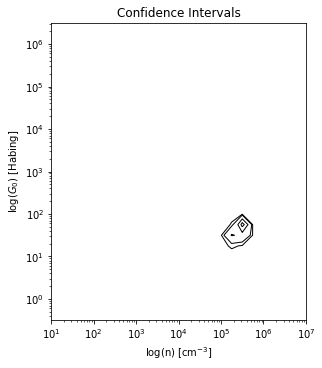

In [13]:
plot.confidence_intervals()

#### What are the model ratios matching these observations?

In [14]:
p._modelratios.keys()

/home/mpound/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dict_keys(['OI_145/CII_158', 'CI_609/CO_21', 'CII_158/CI_609'])

#### Plot one of the model ratios

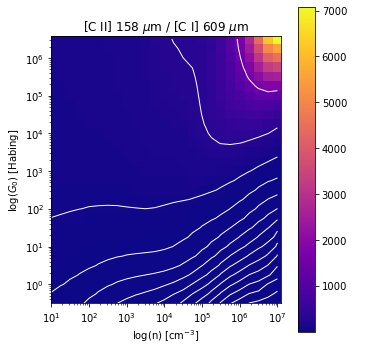

In [15]:
plot.modelratio("CII_158/CI_609")

#### Save the most recent figure to a PNG

In [16]:
plot.savefig("CII_CI.png")

/home/mpound/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Overlay all the ratios and errors in model space.

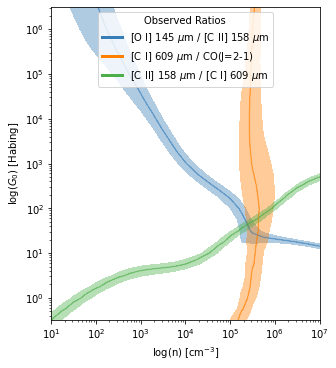

In [17]:
plot.overlay_all_ratios(yaxis_unit="Habing",figsize=(5,5))

# What if want to fit multiple sets of measurements that aren't in map form?
You can do a bulk import and fit by
reading in tables that contain intensities for individual lines to 
create a `Measurement` instance containing a 1-D array of data points using [*Measurement.from_table()*.](http://pdrtpy.readthedocs.io/en/latest/pdrtpy.measurement.html#pdrtpy.measurement.Measurement.from_table)  

Below is an example using \[C II\], CO(3-2), and FIR data on the source RCW 49 from [Tiwari et al. 2021.](https://ui.adsabs.harvard.edu/abs/2021ApJ...914..117T/abstract)  In this example, the tables are in IPAC format, but any Astropy supported table format is acceptable.  

In [18]:
m1 = Measurement.from_table("rcw49_nc_cii158.tab")
m2 = Measurement.from_table("rcw49_nc_co32.tab")
m3 = Measurement.from_table("rcw49_nc_fir.tab")
ms = ModelSet("wk2006",z=1)
lrf = LineRatioFit(ms,measurements=[m1,m2,m3])
# run it
lrf.run()

/home/mpound/src/release_branch/pdrtpy/pdrtpy/tool/lineratiofit.py:343: UserWarning: LineRatioFit: No beam parameters in Measurement headers, assuming they are all equal!
  self._check_compatibility()


Plotting in `LineRatioPlot` is set up to handle single pixels or spatial maps, rather than vectors. But you can examine the inputs and results in a table.  The `table` property returns the inputs and fits in an astropy Table.   If you have not yet called `run()` it will include only your input `Measurements`.

In [19]:
t=lrf.table
t.show_in_notebook()

idx,CII_158,CO_32,FIR,CII_158/CO_32,CII_158/FIR,Radiation Field,H2 Volume Density,Chi-square
,erg / (cm2 s sr),erg / (cm2 s sr),erg / (cm2 s sr),,,Habing,1 / cm3,
0,4.97E-04,1.51E-06,2.16E-01,3.30E+02,2.31E-03,3.16E+02,3.16E+03,5.07E-01
1,6.14E-04,2.44E-06,1.60E-01,2.51E+02,3.85E-03,3.16E+02,3.16E+03,4.48E-01
2,6.05E-04,1.75E-06,1.67E-01,3.45E+02,3.63E-03,3.16E+02,3.16E+03,5.26E-01
3,6.02E-04,1.29E-06,1.84E-01,4.66E+02,3.28E-03,3.16E+02,3.16E+03,4.66E-01
4,5.49E-04,1.12E-06,2.01E-01,4.89E+02,2.74E-03,3.16E+02,3.16E+03,2.64E-02
5,4.98E-04,1.28E-06,2.29E-01,3.88E+02,2.17E-03,3.16E+02,3.16E+03,2.77E-01
6,5.05E-04,1.38E-06,2.37E-01,3.66E+02,2.13E-03,3.16E+02,3.16E+03,1.56E-01
7,5.65E-04,1.60E-06,2.18E-01,3.53E+02,2.59E-03,3.16E+02,3.16E+03,3.12E-01
8,5.28E-04,1.68E-06,1.90E-01,3.14E+02,2.77E-03,3.16E+02,5.62E+03,4.51E-02


#### From here you can use matplotlib tools to explore the data further.
For example, below is a plot of two intensity ratios.

Text(0, 0.5, 'CII_158/CO_32')

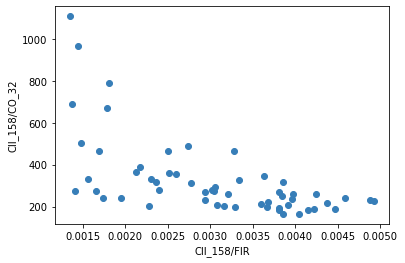

In [20]:
import matplotlib.pyplot as plt
x='CII_158/FIR'
y='CII_158/CO_32'
plt.scatter(t[x],t[y])
plt.xlabel(x)
plt.ylabel(y)

#### This shows a scatter plot of CII 158 $\mu$m intensity vs. $G_0$.   
The data are quantized to the model grid.

Text(0, 0.5, 'Radiation Field [Habing]')

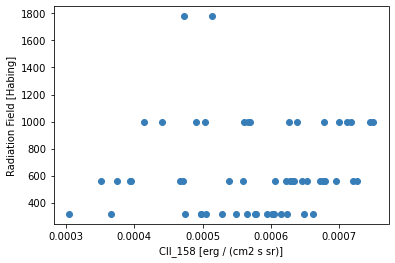

In [21]:
x='CII_158'
y='Radiation Field'
plt.scatter(t[x],t[y])
plt.xlabel(f'{x} [{t[x].unit}]')
plt.ylabel(f'{y} [{t[y].unit}]')

#### And here is $\chi^2$ vs. $G_0$

Text(0, 0.5, '$G_0$ [Habing]')

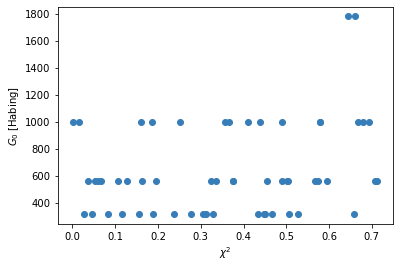

In [22]:
y='Radiation Field'
x='Chi-square'
plt.scatter(t[x],t[y])
plt.xlabel(r'$\chi^2$')
plt.ylabel(r'$G_0$'+f' [{t[y].unit}]')